In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [8]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [9]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


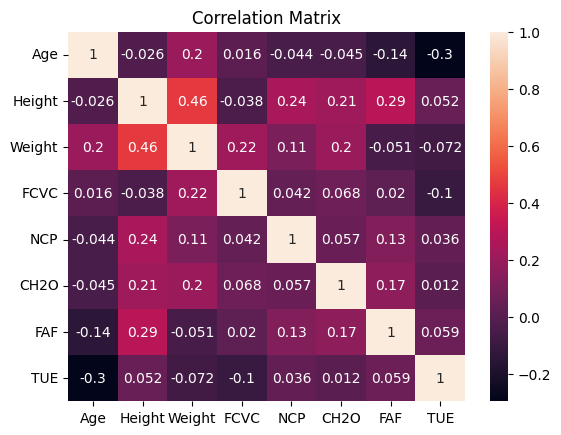

In [10]:
corr = df.corr()
sb.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

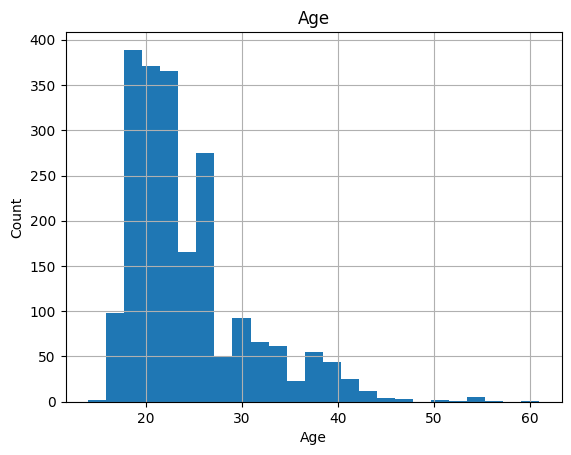

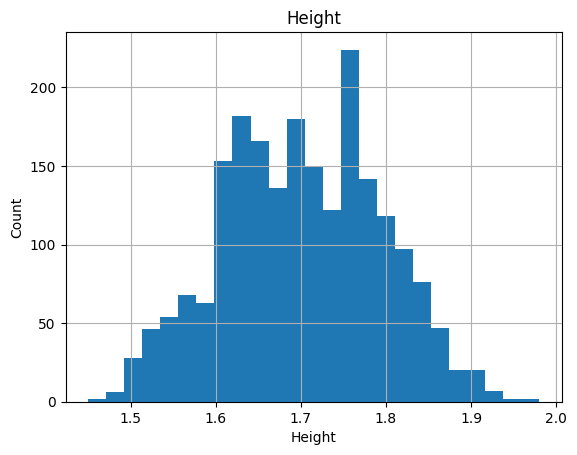

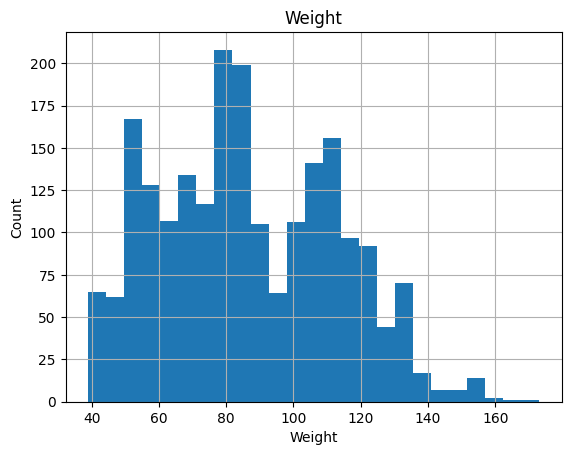

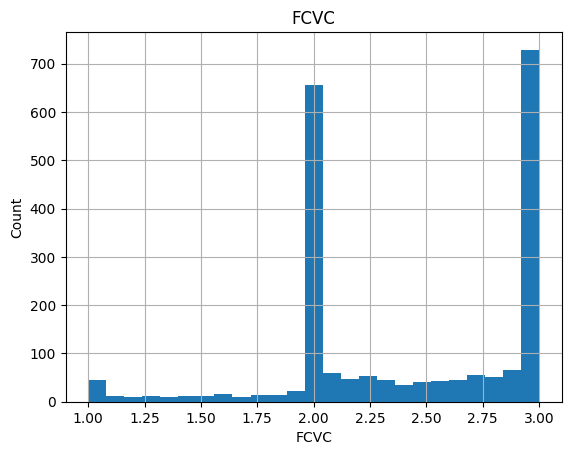

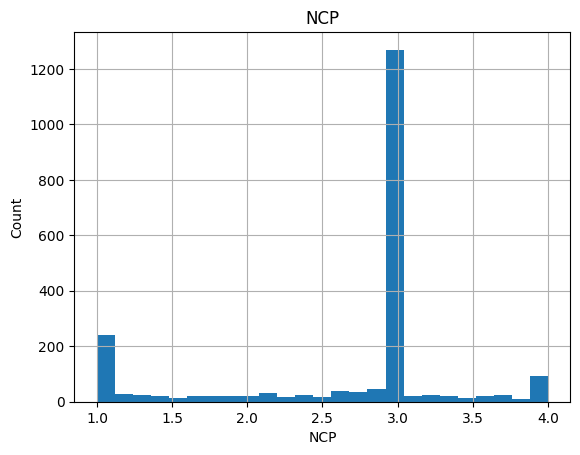

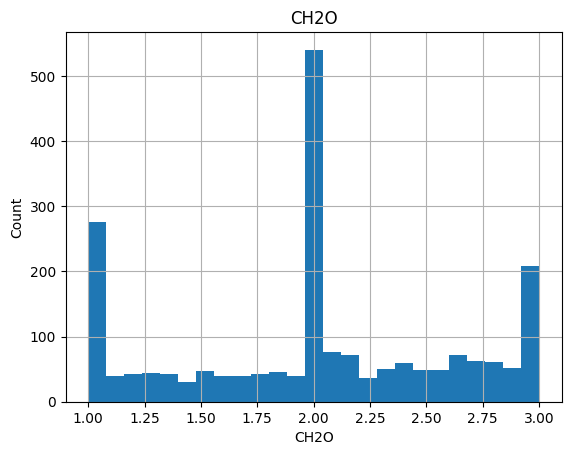

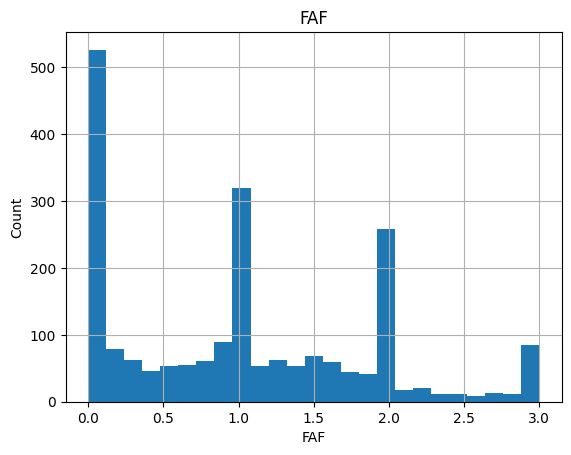

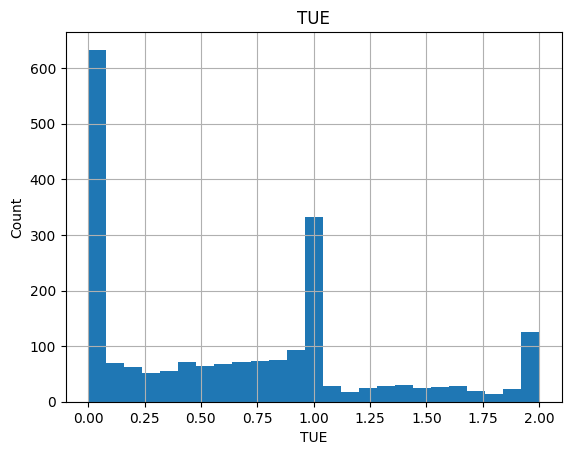

In [11]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

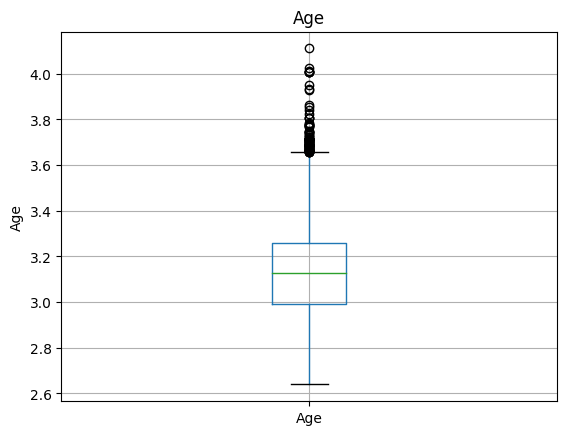

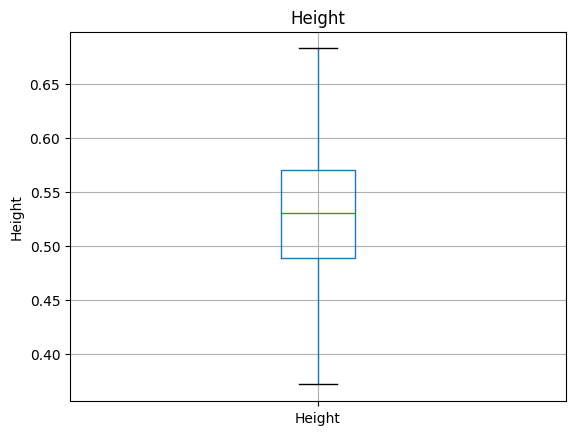

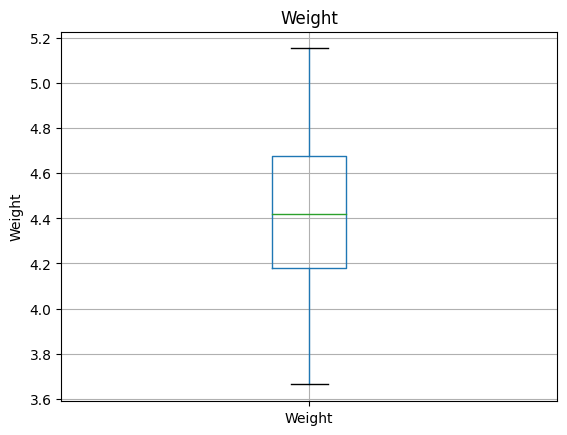

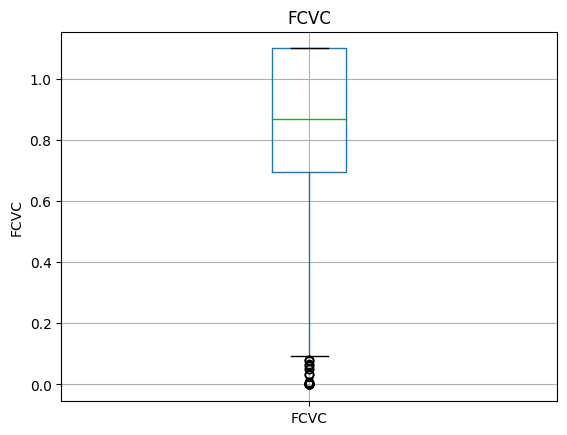

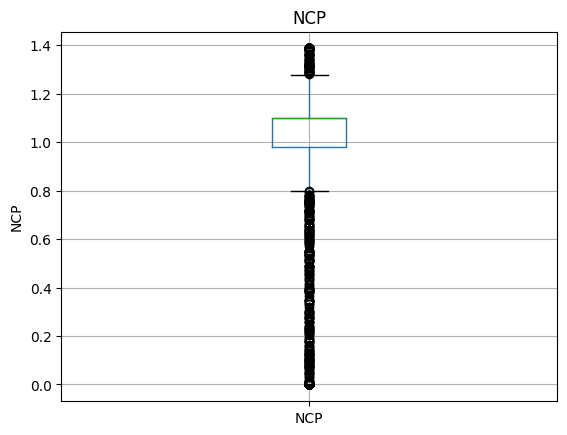

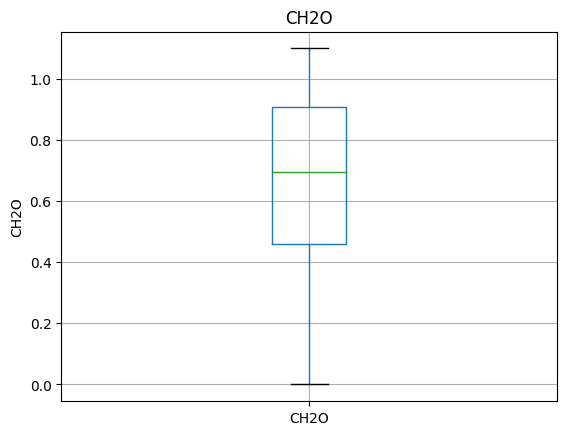

In [12]:
# Outliers
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [13]:
# Categorical Variables
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is family_history_with_overweight and number of categories are 2
The feature is FAVC and number of categories are 2
The feature is CAEC and number of categories are 4
The feature is SMOKE and number of categories are 2
The feature is SCC and number of categories are 2
The feature is CALC and number of categories are 4
The feature is MTRANS and number of categories are 5
The feature is NObeyesdad and number of categories are 7


In [15]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder


In [17]:
# Preprocess the dataset
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = encoder.fit_transform(data['FAVC'])
data['CAEC'] = encoder.fit_transform(data['CAEC'])
data['SMOKE'] = encoder.fit_transform(data['SMOKE'])
data['SCC'] = encoder.fit_transform(data['SCC'])
data['CALC'] = encoder.fit_transform(data['CALC'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [18]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [21]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    adj_r2 = 1 - (1-r_squared)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)
    return mae, mse, rmse, r_squared, adj_r2

In [22]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","Adj. R2 Score","RMSE (Cross-Validation)"])

In [23]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestClassifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

print("-"*40)
print("Random Forest Classifier:")
print(classification_report(y_test, predictions))

MAE: 0.12293144208037825
MSE: 0.43498817966903075
RMSE: 0.6595363368829884
R2 Score: 0.8822183482240139
Adj. R2 Score: 0.877576706774714
RMSE Cross-Validation: 0.6365951750035523
----------------------------------------
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.89      0.89        56
           6       0.96      0.98      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423



In [24]:
decesion_tree = DecisionTreeClassifier()
decesion_tree.fit(X_train, y_train)
predictions = decesion_tree.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
rmse_cross_val = rmse_cv(decesion_tree)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "DecisionTreeClassifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)
print("-"*40)
print("Decision Tree Classifier:")
print(classification_report(y_test, predictions))

MAE: 0.1276595744680851
MSE: 0.3971631205673759
RMSE: 0.6302087912488812
R2 Score: 0.8924602309871432
Adj. R2 Score: 0.8882222105334345
RMSE Cross-Validation: 0.8096452554687531
----------------------------------------
Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.89      0.87      0.88        62
           2       0.97      0.94      0.95        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.94      0.94      0.94        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
predictions = logistic_regression.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
rmse_cross_val = rmse_cv(logistic_regression)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LogisticRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

print("-"*40)
print("Logistic Regression Classifier:")
print(classification_report(y_test, predictions))

MAE: 0.9739952718676123
MSE: 3.513002364066194
RMSE: 1.8743004999375616
R2 Score: 0.04878513837437359
Adj. R2 Score: 0.011298838408831724
RMSE Cross-Validation: 1.803588012716584
----------------------------------------
Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423



In [26]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
rmse_cross_val = rmse_cv(svm_classifier)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "svm_classifier","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

print("-"*40)
print("SVM Classifier:")
print(classification_report(y_test, predictions))

MAE: 1.0236406619385343
MSE: 3.3404255319148937
RMSE: 1.8276831048939786
R2 Score: 0.09551372848115058
Adj. R2 Score: 0.059868949307994024
RMSE Cross-Validation: 1.8289674096387913
----------------------------------------
SVM Classifier:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.41      0.54        58
           4       0.56      1.00      0.72        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.59      0.57      0.54       423

